## Shape Matching

**cv2.matchShapes(contour template, contour, method, method parameter)**

**Output** – match value (lower values means a closer match)

- Contour Template – This is our reference contour that we’re trying to find in the new image
- Contour – The individual contour we are checking against
- Method – Type of contour matching (1, 2, 3)
- Method Parameter – leave alone as 0.0 (not fully utilized in python OpenCV)


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
image = cv2.imread('4star.jpg', 0)

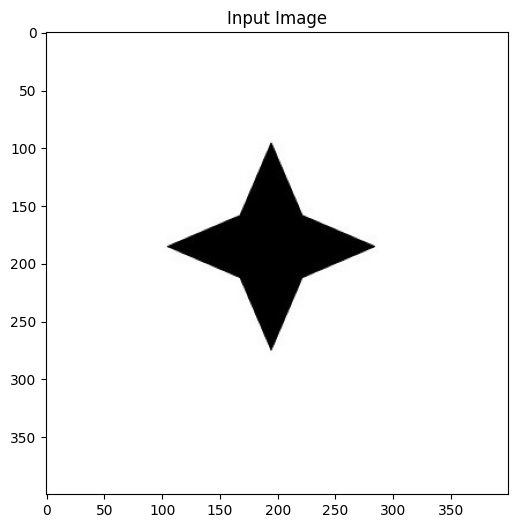

In [7]:
plt.figure(figsize=(6, 6))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.show()

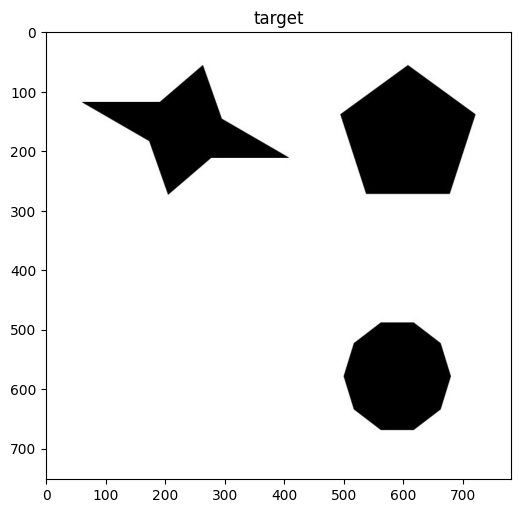

In [11]:
# Load the target image with the shapes we're trying to match
target = cv2.imread('target.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title('target')

plt.show()

In [9]:
# Threshold first image before using cv2.findContours
ret, thresh1 = cv2.threshold(image, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

In [12]:
# Threshold first image before using cv2.findContours
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

0.13090888511130666
0.1591114171521827
0.14997371347484886
0.07079441046541284


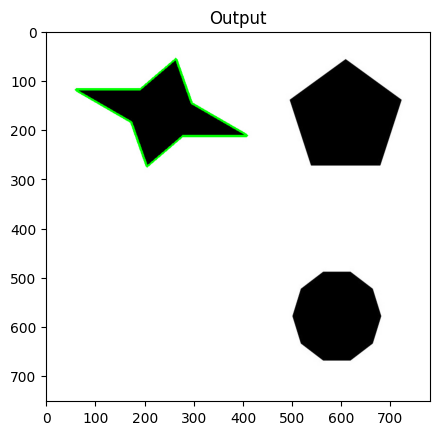

In [13]:
for c in contours:
    # Iterate through each contour in the target image and use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print(match)
    
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = []         

cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)

plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title('Output'); plt.show()

http://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html